# Python Notebook for ANN model
This is a python notebook for the ANN model that is implemented using Bambu. This is solely for plotting and visualization purposes.

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import Callback

## Loading dataset
The dataset used is the Wisconsin Breast Cancer detection (diagnostic) dataset hosted on the UC Irvine machine learning repository. 

[Dataset link](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

[Details on scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html)

In [2]:
# Loading and splitting dataset 
x,y = load_breast_cancer(return_X_y = True)

x_train, x_test, \
    y_train, y_test = train_test_split(x,y,
                                       test_size=0.20,
                                       random_state=23)

## Standardizing features
Using `StandardScaler()` to prevent issues relating to scaling. This helps us converge faster during training and prevents certain weights from dominating due to scale issues.

In [3]:
#Standardizing features
st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.transform(x_test)

## ANN Initialization
There are three layers in this neural network. The first layer is the input layer, with 16 neurons, and the activation function used is ReLU. The second layer (hidden layer) consists of 8 neurons, the activation function used is ReLU as well. The output layer has 1 neuron (binary classification) and the activation function used is Sigmoid.

Dropout layers are added in between to prevent overfitting, with the dropout probability of 0.5 for each dropout layer to keep things simple.

There is a class to store the network performance metrics like accuracy and loss per epoch for plotting purposes. 

In [4]:
# Initializing ANN
classifier = Sequential()

#Input layer
classifier.add(Dense(16, activation='relu', input_shape=(30,)))
#Hidden layer
classifier.add(Dense(8,activation='relu'))
classifier.add(Dropout(0.5))
#Output layer
classifier.add(Dense(1,activation='sigmoid'))

#Compiling ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
#Performance metrics
class Metrics(Callback):
  def on_epoch_end(self, epoch, logs=None):
    loss_val.append(logs.get('loss'))
    accuracy_val.append(logs.get('accuracy'))

loss_val = []
accuracy_val = []
metrics = Metrics() 

#Fitting the ANN to training set
classifier.fit(x_train, y_train, batch_size=100, epochs=1000, callbacks=[metrics]) 

Epoch 1/1000
5/5 [==============================] - 2s 5ms/step - loss: 0.6580 - accuracy: 0.5780
Epoch 2/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.5966 - accuracy: 0.6747
Epoch 3/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.5813 - accuracy: 0.6857
Epoch 4/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.5313 - accuracy: 0.7451
Epoch 5/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.4940 - accuracy: 0.7802
Epoch 6/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.4673 - accuracy: 0.8066
Epoch 7/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.4541 - accuracy: 0.8044
Epoch 8/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.4253 - accuracy: 0.8330
Epoch 9/1000
5/5 [==============================] - 0s 7ms/step - loss: 0.4316 - accuracy: 0.8242
Epoch 10/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.3951 - accuracy: 0.8549
Epoch 11/1000
5/5 [

## Plotting
The following section plots the confusion matrix and the network performance metrics. 

4/4 [==============================] - 0s 2ms/step


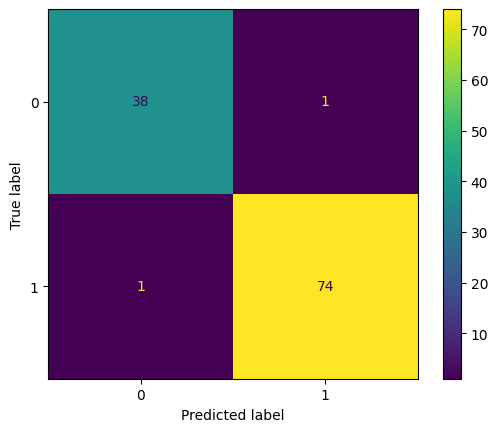

Confusion matrix: 
[[38  1]
 [ 1 74]]
Accuracy score is: 98.24561403508771 %




In [6]:
#Confusion matrix

#Predictions
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

#Making confusion matrix
c_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
disp.plot()
plt.show()
print("Confusion matrix: ")
print(c_matrix)
print('Accuracy score is:',100*accuracy_score(y_test, y_pred),'%\n\n')

range(1, 1001)
[0.6579973101615906, 0.5966389179229736, 0.581337034702301, 0.5313030481338501, 0.4940325915813446, 0.46734410524368286, 0.4541073441505432, 0.42531001567840576, 0.4316401183605194, 0.3950517177581787, 0.40008893609046936, 0.35892122983932495, 0.34968140721321106, 0.32726213335990906, 0.32228806614875793, 0.32048794627189636, 0.3010590672492981, 0.3093949854373932, 0.27870291471481323, 0.28529003262519836, 0.2660934329032898, 0.2767612636089325, 0.24122241139411926, 0.24905739724636078, 0.2602742314338684, 0.24846813082695007, 0.20471511781215668, 0.24079152941703796, 0.22317610681056976, 0.20843207836151123, 0.2326515018939972, 0.24905934929847717, 0.2215350866317749, 0.2255896031856537, 0.21300938725471497, 0.18950006365776062, 0.17007143795490265, 0.20174121856689453, 0.1740855723619461, 0.18552815914154053, 0.1875077188014984, 0.15793165564537048, 0.18491163849830627, 0.17032918334007263, 0.1784263402223587, 0.17473147809505463, 0.15535840392112732, 0.168852478265762

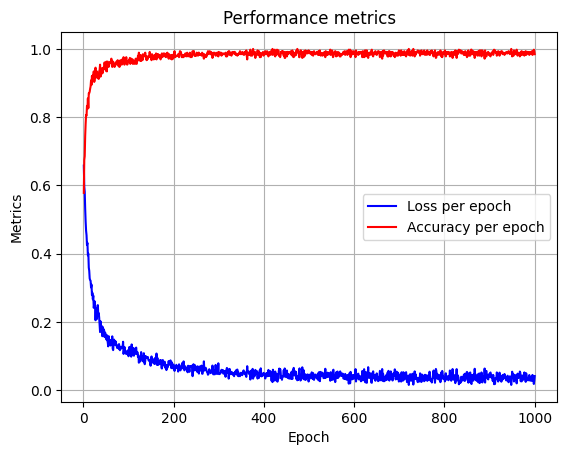

In [7]:
#Plotting metrics
epochs = range(1,len(loss_val)+1)

print(epochs)
print(loss_val)

plt.plot(epochs, loss_val, "b", label="Loss per epoch")
plt.plot(epochs, accuracy_val, "r-", label="Accuracy per epoch")
plt.title("Performance metrics")
plt.xlabel("Epoch")
plt.ylabel("Metrics")
plt.legend()
plt.grid(True)
plt.show() 

## Model parameters
The following code extracts weights and biases. 

In [8]:
#Store model parameters: weight and bias
first_layer_weights = classifier.layers[0].get_weights()[0]
first_layer_biases = classifier.layers[0].get_weights()[1]
second_layer_weights = classifier.layers[1].get_weights()[0]
second_layer_biases = classifier.layers[1].get_weights()[1]
output_layer_weights = classifier.layers[3].get_weights()[0]
output_layer_biases = classifier.layers[3].get_weights()[1]

In [11]:
print(first_layer_biases)
print("=====================================================================================")
print(first_layer_weights)
print("=====================================================================================")
print(second_layer_biases)
print("=====================================================================================")
print(second_layer_weights)
print("=====================================================================================")
print(output_layer_biases)
print("=====================================================================================")
print(output_layer_weights)
print("=====================================================================================")

[ 0.2754713   0.43047842  0.25253862  0.19714668 -0.18232702  0.28316766
 -0.04821428 -0.04398135  0.10056928  0.01249699  0.22774577  0.13292642
 -0.14039855  0.14483482  0.03483801  0.41012582]
[[ 4.44833398e-01  5.27642965e-01  3.02261058e-02  1.28979176e-01
  -4.33012247e-01 -1.26705498e-01 -1.71395913e-01 -3.69297534e-01
  -4.95801158e-02 -4.39238921e-02  4.10722941e-01 -2.44293869e-01
   2.29431942e-01 -2.76788890e-01  3.62300515e-01  3.43232810e-01]
 [ 2.68443882e-01  4.02893454e-01  2.52380311e-01 -2.14850381e-01
  -4.62091953e-01 -4.20894444e-01 -4.56283301e-01 -1.54618189e-01
  -5.85550107e-02  4.51670408e-01  2.08671197e-01  4.37848985e-01
   2.86959022e-01 -1.03195906e+00  4.50763572e-03  2.95161217e-01]
 [ 3.81524056e-01 -6.66263886e-03  2.35679865e-01  6.84495121e-02
   7.31873140e-02  2.69683540e-01  1.69657052e-01 -2.93357879e-01
   1.91514626e-01 -1.15682527e-01 -7.38411099e-02  1.33534238e-01
  -1.45223707e-01 -1.82562366e-01 -2.86213875e-01  3.57627839e-01]
 [ 2.4894

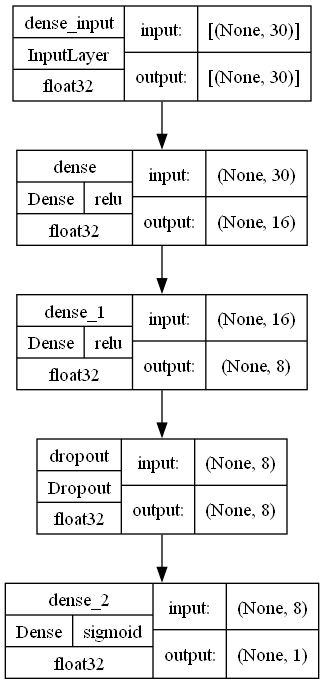

In [9]:
from keras.utils import plot_model
dot_img_file = "C:\\Users\\KIIT\\Desktop\\model.png"
plot_model(classifier, to_file=dot_img_file, show_shapes=True, show_dtype=True, expand_nested=True, show_layer_activations=True)